In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas
data = pd.read_csv("../Resources/AAL.csv") 
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-27,40.150002,40.869999,39.480000,39.689999,37.929569,10186000
1,2016-01-28,39.610001,39.790001,37.660000,38.139999,36.448322,17112300
2,2016-01-29,37.520000,39.090000,36.599998,38.990002,37.260632,20957500
3,2016-02-01,39.000000,39.939999,38.630001,39.380001,37.633320,12023500
4,2016-02-02,38.830002,38.970001,37.000000,37.029999,35.387558,12401400


In [2]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1.343000e+03
mean,33.795979,34.325867,33.240879,33.757937,33.015835,2.166311e+07
std,12.552016,12.615648,12.511749,12.573261,12.051903,3.416586e+07
min,8.770000,9.190000,8.250000,9.040000,9.040000,1.352400e+06
25%,26.380001,26.840000,26.025001,26.370000,26.103607,5.425000e+06
50%,34.980000,35.500000,34.369999,34.790001,33.977467,7.538700e+06
75%,43.979999,44.524999,43.344999,43.924999,42.652268,1.815225e+07
max,58.790001,59.080002,57.799999,58.470001,56.988728,4.286171e+08


In [3]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are needed for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2016-01-27,39.689999
1,2016-01-28,38.139999
2,2016-01-29,38.990002
3,2016-02-01,39.380001
4,2016-02-02,37.029999


In [4]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


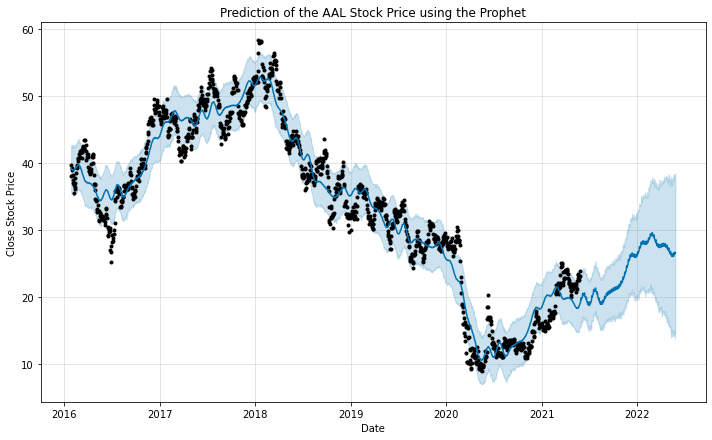

In [5]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the AAL Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

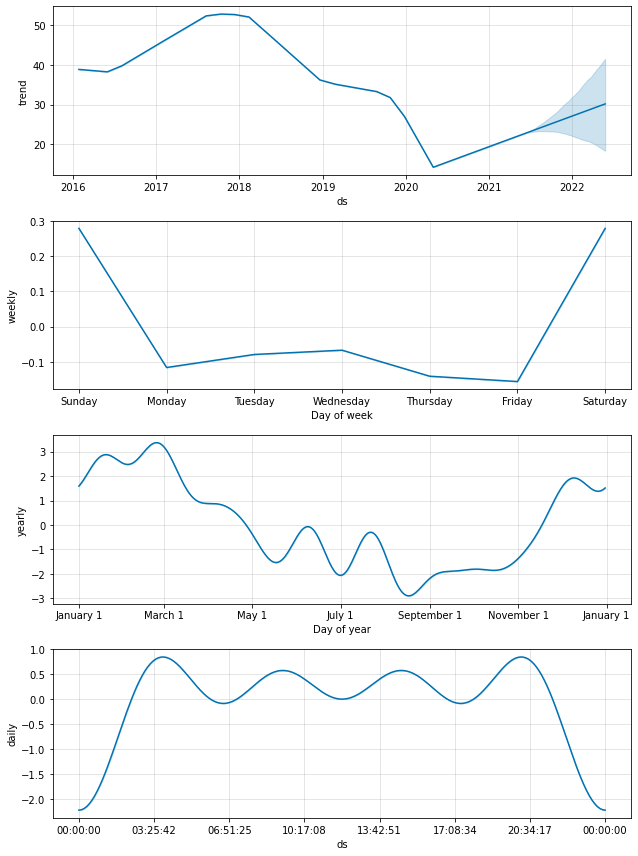

In [6]:
m.plot_components(prediction)
plt.show()